In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of epochs and the learning rate
EPOCHS = 25
LEARNING_RATE = 0.001

In [ ]:
# Read diabetes data from GitHub repository
diabetes_df = pd.read_csv("https://github.com/KaranAgrawal1509/Neural-Network-From-Scratch/raw/main/diabetes_data.csv")

In [ ]:
diabetes_df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## Perform EDA Here

In [ ]:
# Check for missing values
print("\nMissing values:")
print(diabetes_df.isnull().sum())


Missing values:
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


In [ ]:
# Basic descriptive statistics
print("\nDescriptive statistics:")
print(diabetes_df.describe())


Descriptive statistics:
                Age           Sex      HighChol     CholCheck           BMI  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       8.584055      0.456997      0.525703      0.975259     29.856985   
std        2.852153      0.498151      0.499342      0.155336      7.113954   
min        1.000000      0.000000      0.000000      0.000000     12.000000   
25%        7.000000      0.000000      0.000000      1.000000     25.000000   
50%        9.000000      0.000000      1.000000      1.000000     29.000000   
75%       11.000000      1.000000      1.000000      1.000000     33.000000   
max       13.000000      1.000000      1.000000      1.000000     98.000000   

             Smoker  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  70692.000000          70692.000000  70692.000000  70692.000000   
mean       0.475273              0.147810      0.703036      0.611795   
std        0.499392              0.354914   

In [ ]:
# Correlation matrix
print("\nCorrelation matrix:")
corr = diabetes_df.corr()
corr


Correlation matrix:


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


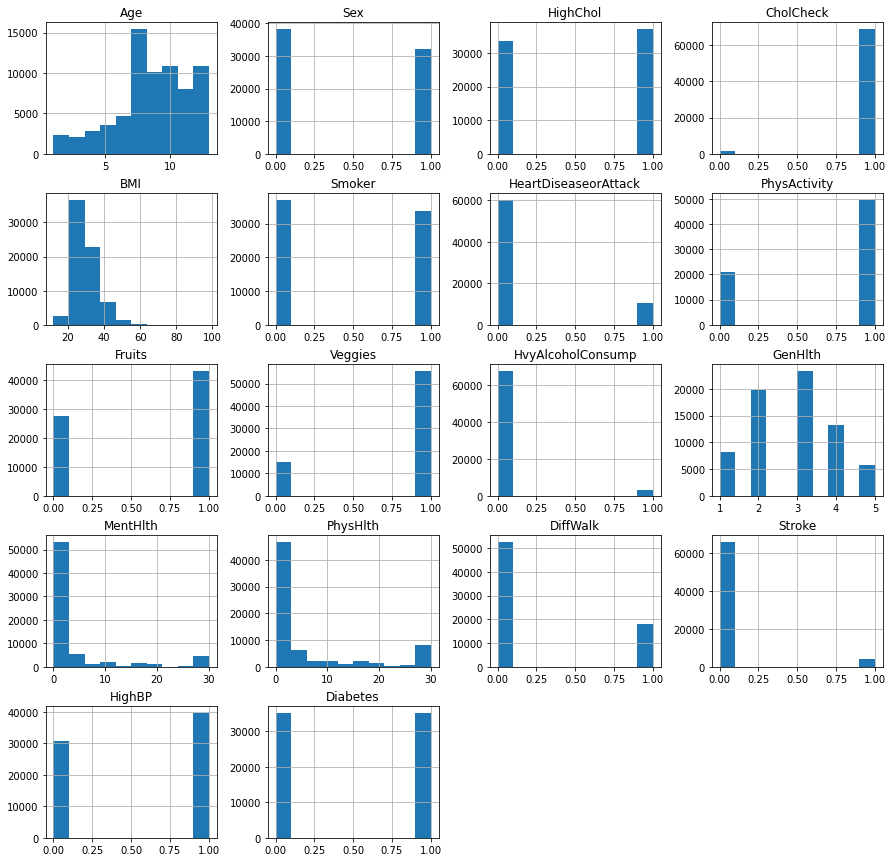

In [ ]:
# Visualizations
# Histograms
diabetes_df.hist(figsize=(15, 15))
plt.show()

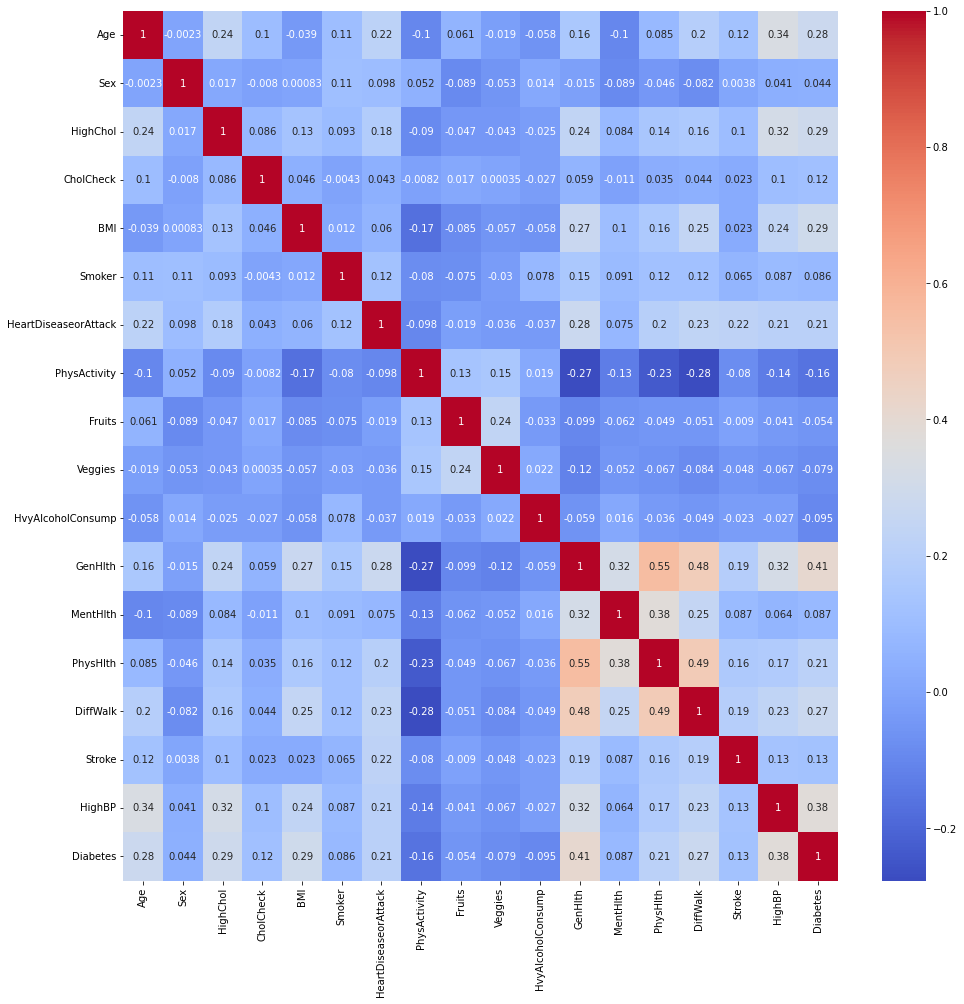

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Training

In [ ]:
# Split the diabetes data into features (X) and labels (y)
X = diabetes_df.drop('Diabetes', axis=1)
y = diabetes_df['Diabetes']


In [ ]:
# Standardize the features using mean normalization and standard deviation scaling
X = X.apply(lambda x: (x - x.mean()) / x.std(), axis=0)


In [ ]:
# Get the number of rows in the feature matrix
n_rows = X.shape[0]

# Define the proportion of the dataset to use for testing
test_proportion = 0.2

# Calculate the number of rows to use for testing
n_test = int(n_rows * test_proportion)

# Shuffle the rows of X and y together
shuffled_data = np.column_stack((X, y))
np.random.shuffle(shuffled_data)

# Split the shuffled data into training and testing sets
X_train, y_train = shuffled_data[n_test:, :-1], shuffled_data[n_test:, -1]
X_test, y_test = shuffled_data[:n_test, :-1], shuffled_data[:n_test, -1]


In [ ]:
# Print the dimensions of the training and testing sets
print("X_train dimensions:", X_train.shape)
print("y_train dimensions:", y_train.shape)
print("X_test dimensions:", X_test.shape)
print("y_test dimensions:", y_test.shape)


X_train dimensions: (56554, 17)
y_train dimensions: (56554,)
X_test dimensions: (14138, 17)
y_test dimensions: (14138,)


In [ ]:
# Helper Functions

def calculate_accuracy(y_true, y_pred):
    # Calculate the number of correctly classified instances and the total number of instances
    correct = np.sum(y_true == y_pred)
    total = y_true.shape[0]
    # Calculate the accuracy as the ratio of correct instances to total instances
    accuracy = correct / total
    return accuracy

def calculate_confusion_matrix(y_true, y_pred):
    # Convert the true and predicted labels to integers
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    # Calculate the number of unique classes
    num_classes = len(np.unique(np.concatenate((y_true, y_pred))))
    # Initialize an empty confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    # Iterate over each instance and update the confusion matrix
    for i in range(y_true.shape[0]):
        confusion_matrix[y_true[i], y_pred[i]] += 1

    return confusion_matrix

def calculate_binary_f1_score(y_true, y_pred):
    # Calculate the confusion matrix for the binary classification problem
    confusion_matrix = calculate_confusion_matrix(y_true, y_pred)
    # Extract the true positives, false positives, and false negatives from the confusion matrix
    true_positives = confusion_matrix[1, 1]
    false_positives = confusion_matrix[0, 1]
    false_negatives = confusion_matrix[1, 0]

    # Calculate the precision and recall
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # Calculate the F1 score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def predict(X, weights, bias, activation_function):
    # Calculate the predicted label for each instance in X using the given weights, bias, and activation function
    z = np.dot(X, weights) + bias
    y_pred = activation_function(z)
    y_pred = (y_pred > 0).astype(int)
    y_pred = y_pred.reshape(-1)
    return y_pred


In [ ]:
# Activation Functions

def relu(z):
    # Rectified Linear Unit (ReLU) activation function
    return np.maximum(0, z)

def tanh(z):
    # Hyperbolic tangent (tanh) activation function
    return np.tanh(z)


In [ ]:
# Activation Function Derivatives

def relu_derivative(z):
    # Derivative of the Rectified Linear Unit (ReLU) activation function
    return (z > 0).astype(float)

def tanh_derivative(z):
    # Derivative of the Hyperbolic tangent (tanh) activation function
    return 1 - np.power(tanh(z), 2)


In [ ]:
# Loss Function
def log_loss(y_true, y_pred):
    # Calculate the logarithmic loss (log loss) between the true labels and predicted probabilities
    y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

In [ ]:
# Stochastic Gradient Descent (SGD) Algorithm
def stochastic_gradient_decent(X, y, epochs, learning_rate, activation_function, activation_derivative):
    # Initialize weights and bias
    np.random.seed(42)  # for reproducibility
    weights = np.random.randn(X.shape[1], 1)
    bias = 0
    
    loss_history = []

    # Loop over the specified number of epochs
    for epoch in range(epochs):
        # Shuffle the dataset
        idx = np.random.permutation(X.shape[0])
        X_shuffled, y_shuffled = X[idx], y[idx]

        epoch_loss = []

        # Loop over each instance in the shuffled dataset
        for i in range(X_shuffled.shape[0]):
            x_i = X_shuffled[i].reshape(1, -1)
            y_i = y_shuffled[i]
            
            # Forward pass
            z_i = np.dot(x_i, weights) + bias
            y_pred_i = activation_function(z_i)

            # Calculate loss and store in epoch_loss
            loss = log_loss(y_i, y_pred_i)
            epoch_loss.append(loss)

            # Backward pass (calculate gradients)
            delta = (y_pred_i - y_i) * activation_derivative(z_i)
            dw = np.dot(x_i.T, delta)
            db = np.sum(delta)

            # Update weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Compute average loss for the epoch and append to loss_history
        avg_epoch_loss = np.mean(epoch_loss)
        loss_history.append(avg_epoch_loss)

        # Print average loss after every 2 epochs
        if (epoch + 1) % 2 == 0:
            print(f"Epoch {epoch + 1}: Average Loss = {avg_epoch_loss:.6f}")

    return weights, bias, loss_history

## Trained on Relu

In [ ]:
# Train the neural network using the Stochastic Gradient Descent (SGD) algorithm
weights, bias, loss_history = stochastic_gradient_decent(
    X_train, y_train, EPOCHS, LEARNING_RATE, relu, relu_derivative
)

Epoch 2: Average Loss = 5.053828
Epoch 4: Average Loss = 4.300909
Epoch 6: Average Loss = 4.296251
Epoch 8: Average Loss = 4.209358
Epoch 10: Average Loss = 4.010683
Epoch 12: Average Loss = 4.009028
Epoch 14: Average Loss = 4.008053
Epoch 16: Average Loss = 4.005450
Epoch 18: Average Loss = 4.014021
Epoch 20: Average Loss = 4.003323
Epoch 22: Average Loss = 4.010201
Epoch 24: Average Loss = 4.009318


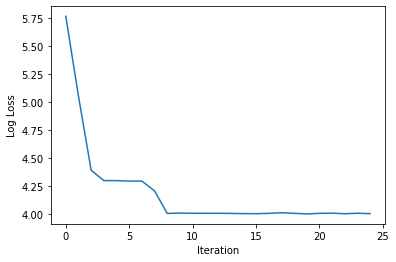

In [ ]:
# Visualize the Training Loss

# Plot the loss history as a function of the number of iterations
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.show()


In [ ]:
y_pred = predict(X_test, weights, bias, relu)

In [ ]:
# Evaluate the Model on the Test Set

# Calculate the accuracy, confusion matrix, and F1 score for the predicted labels on the test set
accuracy = calculate_accuracy(y_test, y_pred)
confusion_matrix = calculate_confusion_matrix(y_test, y_pred)
f1_score = calculate_binary_f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("F1 Score:", f1_score)

Accuracy: 0.4688074692318574
Confusion Matrix:
 [[2403 4686]
 [2824 4225]]
F1 Score: 0.5294486215538848


## Trained on Tanh

In [ ]:
# Train the neural network using the Stochastic Gradient Descent (SGD) algorithm and a different activation function
weights, bias, loss_history = stochastic_gradient_decent(
    X_train, y_train, EPOCHS, LEARNING_RATE, tanh, tanh_derivative
)

Epoch 2: Average Loss = 0.897059
Epoch 4: Average Loss = 0.894240
Epoch 6: Average Loss = 0.894052
Epoch 8: Average Loss = 0.894235
Epoch 10: Average Loss = 0.893992
Epoch 12: Average Loss = 0.892935
Epoch 14: Average Loss = 0.892628
Epoch 16: Average Loss = 0.892189
Epoch 18: Average Loss = 0.892603
Epoch 20: Average Loss = 0.891909
Epoch 22: Average Loss = 0.893140
Epoch 24: Average Loss = 0.893260


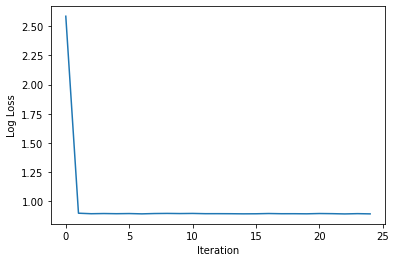

In [ ]:
# Visualize the Training Loss

# Plot the loss history as a function of the number of iterations
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.show()

In [ ]:
# Use the Trained Model to Make Predictions on the Test Set

# Generate predicted labels for the test set using the trained neural network
y_pred = predict(X_test, weights, bias, relu)

In [ ]:
# Evaluate the Trained Model on the Test Set

# Calculate the accuracy, confusion matrix, and F1 score for the predicted labels on the test set
accuracy = calculate_accuracy(y_test, y_pred)
confusion_matrix = calculate_confusion_matrix(y_test, y_pred)
f1_score = calculate_binary_f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("F1 Score:", f1_score)

Accuracy: 0.5650021219408686
Confusion Matrix:
 [[ 997 6092]
 [  58 6991]]
F1 Score: 0.6945161931253726
